```python
# Variables
user = "martoso"
wd = "/home/martoso/Documents/"
```

```python
# Create variables on Databricks notebook
dbutils.widgets.text("username", user)
dbutils.widgets.text("working_directory", wd)
```

# Create database
```sql
CREATE DATABASE IF NOT EXISTS ${username}_training database
USE ${username}_training_database;
-- mode "FAILFAST" will abort file parsing with a RuntimeException if any malformed lines are encountered
CREATE OR REPLACE TEMPORARY VIEW temp_delays USING CSV OPTIONS (
    path '${working_directory}/datasets/flights/departuredelays.csv'
    header "true"
    mode "FAILFAST"
);

CREATE OR REPLACE TABLE external_table LOCATION '${working_directory}/external_table' AS
    SELECT * FROM temp_delays;
   
SELECT * FROM external_table;
```

# Views

```sql
CREATE OR REPLACE VIEW view_delays_ABQ_LAX AS
SELECT * FROM external_table WHERE origin = 'ABQ' AND destination = 'LAX';
SELECT * FROM view_delays_ABQ_LAX;
```

```sql
SHOW tables;
```

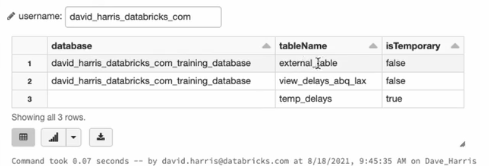

```sql
CREATE OR REPLACE TEMPORARY VIEW temp_view AS
select * from external_table WHERE delay > 120 ORDER BY delay ASC;
SELECT * FROM temp_view
```

```sql
SHOW tables;
```
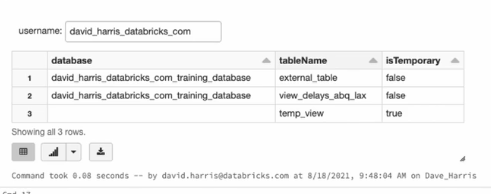

After dettach cluster
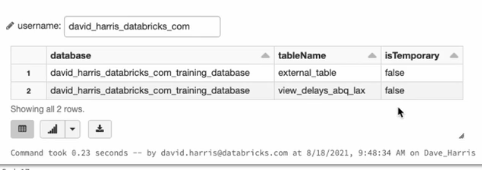

```sql
CREATE OR REPLACE GLOBAL TEMPORARY VIEW global_temp_view_distance AS
SELECT * FROM external_table WHERE distance > 1000;
SELECT * FROM global_temp.global_temp_view_distance
```

```sql
SELECT * FROM globbal_temp.global_temp_view_distance;
```

```sql
SHOW tables;
```

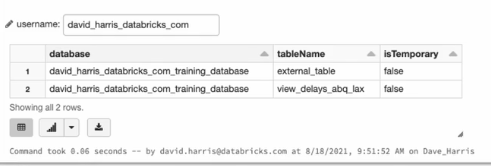

Global temp doesn't show up on table list

# CTE